In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw_analyst_ratings.csv', parse_dates=['date'])

In [3]:
# Preview
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df['headline_length'] = df['headline'].astype(str).apply(len)


In [5]:
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


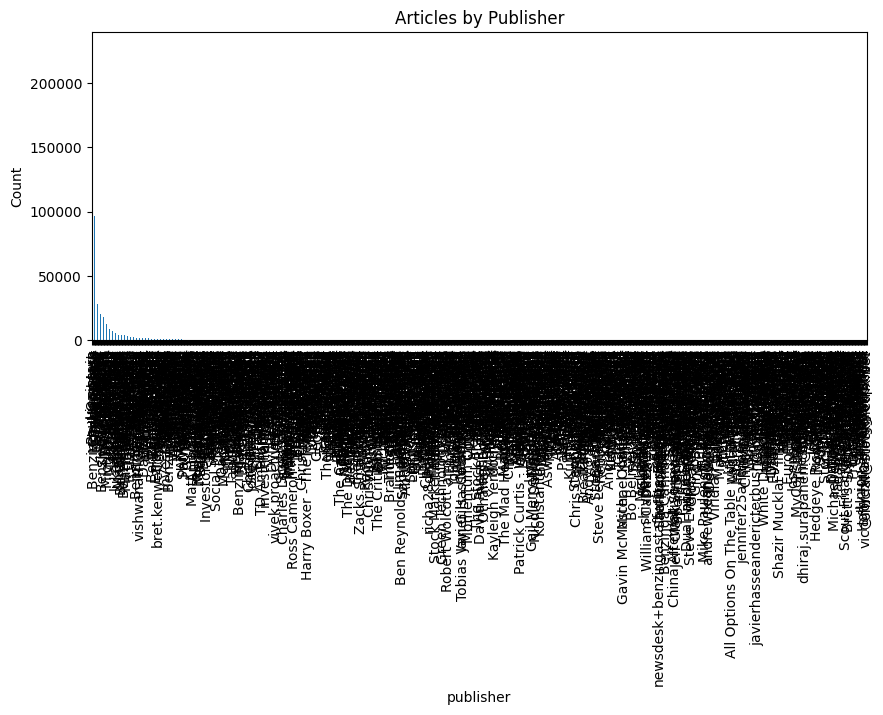

In [6]:
publisher_counts = df['publisher'].value_counts()
publisher_counts.plot(kind='bar', figsize=(10, 4), title='Articles by Publisher')
plt.ylabel('Count')
plt.show()


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

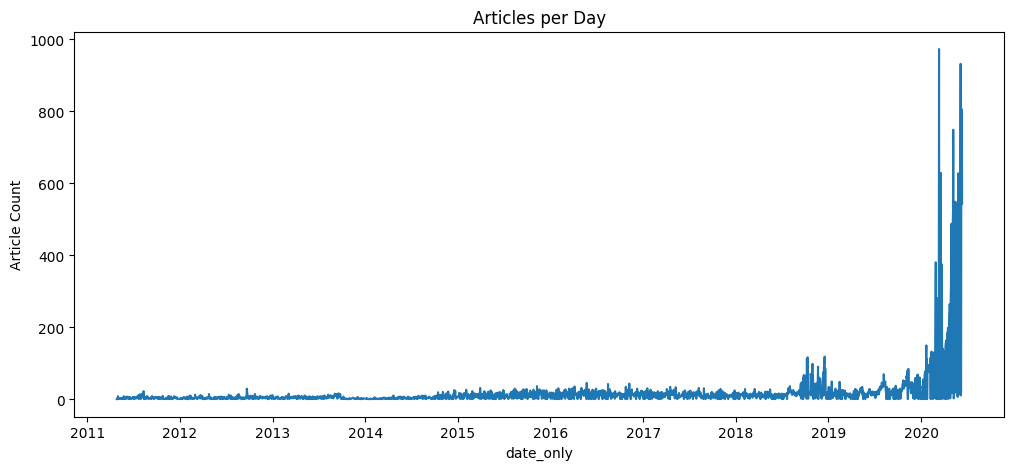

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
df['date_only'] = df['date'].dt.date
articles_by_day = df.groupby('date_only').size()
articles_by_day.plot(figsize=(12, 5), title='Articles per Day')
plt.ylabel('Article Count')
plt.show()

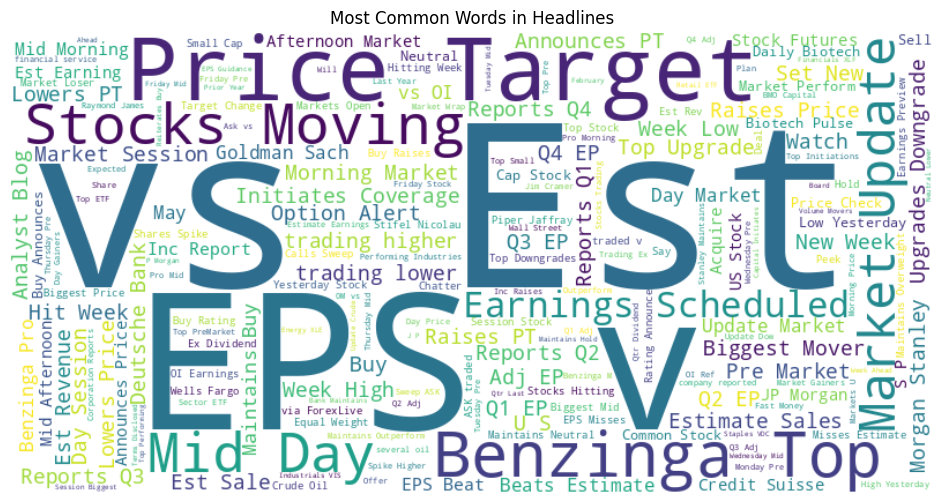

In [12]:

from wordcloud import WordCloud

text = ' '.join(df['headline'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Headlines")
plt.show()